In [50]:
# Explanation of prediction output when activation is sigmoid:
# https://forum.freecodecamp.org/t/model-predict-output/470349

import tensorflow as tf
import tensorflow_datasets as tfds
import logging, os
import pandas as pd
import time
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

BASE_PATH = "../../../../../local_data/practice/tfds/"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"mnist_simple_02/"
os.system("mkdir -p " + OUTPUT_PATH)

# Load the dataset
(train_dataset, validation_dataset), metadata = tfds.load(
    'mnist',
    data_dir=DATA_PATH,
    # split=['train[:80%]', 'train[80%:]'],
    # split=['train[:80%]', 'train[99%:]'],
    split=['train[:10%]', 'train[10%:20%]'],
    with_info=True,
    as_supervised=True
)
print(f"Number of train samples: {train_dataset.cardinality()}")
print(f"Number of test samples: {validation_dataset.cardinality()}")

Number of train samples: 6000
Number of test samples: 6000


In [51]:
# Preprocess the data
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [256, 256])
    image = image / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)

batch_size = 32
train_dataset = train_dataset.cache().batch(batch_size).prefetch(buffer_size=10)
validation_dataset = validation_dataset.cache().batch(batch_size).prefetch(buffer_size=10)


# Apply data augmentation
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    return image, label

train_dataset = train_dataset.map(augment)

In [52]:
# Model prediction
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

Epoch 1/10
188/188 [==============================] - 8s 37ms/step - loss: 0.8622 - sparse_categorical_accuracy: 0.7410 - val_loss: 0.4936 - val_sparse_categorical_accuracy: 0.8403
Epoch 2/10
188/188 [==============================] - 6s 31ms/step - loss: 0.4147 - sparse_categorical_accuracy: 0.8662 - val_loss: 0.3778 - val_sparse_categorical_accuracy: 0.8867
Epoch 3/10
188/188 [==============================] - 6s 32ms/step - loss: 0.2776 - sparse_categorical_accuracy: 0.9110 - val_loss: 0.3306 - val_sparse_categorical_accuracy: 0.9020
Epoch 4/10
188/188 [==============================] - 6s 32ms/step - loss: 0.1978 - sparse_categorical_accuracy: 0.9405 - val_loss: 0.2847 - val_sparse_categorical_accuracy: 0.9197
Epoch 5/10
188/188 [==============================] - 6s 30ms/step - loss: 0.1511 - sparse_categorical_accuracy: 0.9563 - val_loss: 0.2923 - val_sparse_categorical_accuracy: 0.9225
Epoch 6/10
188/188 [==============================] - 5s 29ms/step - loss: 0.0984 - sparse_cate

Text(0.5, 1.0, 'Training and validation loss')

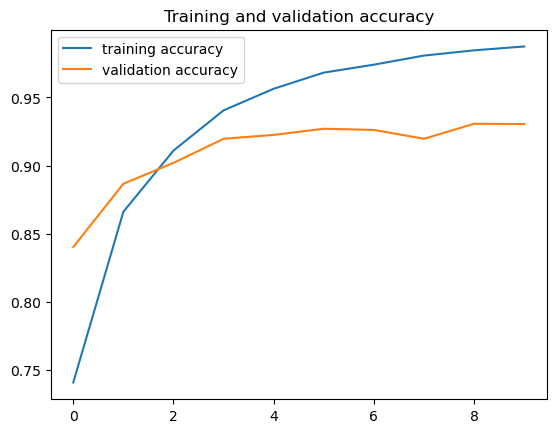

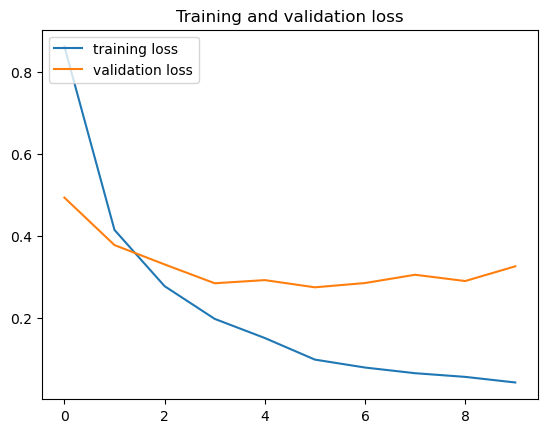

In [53]:
# Train the model
epochs=10
history =model.fit(train_dataset, epochs=epochs,validation_data=validation_dataset)
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'sparse_categorical_accuracy' ]
val_acc  = history.history[ 'val_sparse_categorical_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_plot   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs_plot,     acc , label="training accuracy")
plt.plot  ( epochs_plot, val_acc, label="validation accuracy" )
plt.title ('Training and validation accuracy')
plt.legend(loc="upper left")
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs_plot,     loss , label="training loss")
plt.plot  ( epochs_plot, val_loss , label="validation loss" )
plt.legend(loc="upper left")
plt.title ('Training and validation loss'   )

In [62]:
# Save model
timestr = time.strftime("%Y%m%d-%H%M%S")
acc=val_acc[-1] # last element
filename = f"acc_{acc:.3f}_epochs_{epochs}_date_{timestr}.h5"
# filename = f"epochs_{epochs}_date_{timestr}.h5"
fullpath = f"{OUTPUT_PATH}{filename}"
print("Saving model to ", filename)
model.save(fullpath)

Saving model to  acc_0.930_epochs_10_date_20250718-213927.h5


/media/data/miniconda3/envs/jh_class/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
